Dataset shape: (518, 72)

Columns: ['Quarter', 'State', 'Total_Crashes', 'Num_Injured', 'Num_Killed', 'Total_Vehicles_Involved', 'SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors', 'Quarter_Num', 'Year', 'Quarter_Date', 'Total_Casualties', 'Casualty_Rate', 'Fatality_Rate', 'Vehicles_per_Crash', 'Total_Factors', 'SPV_Prop', 'DAD_Prop', 'PWR_Prop', 'FTQ_Prop', 'Other_Factors_Prop', 'Quarter_Sin', 'Quarter_Cos', 'Severe_Crash', 'High_Casualty', 'State_Encoded', 'State_Adamawa', 'State_Akwa Ibom', 'State_Anambra', 'State_Bauchi', 'State_Bayelsa', 'State_Benue', 'State_Borno', 'State_Cross River', 'State_Delta', 'State_Ebonyi', 'State_Edo', 'State_Ekiti', 'State_Enugu', 'State_FCT', 'State_Gombe', 'State_Imo', 'State_Jigawa', 'State_Kaduna', 'State_Kano', 'State_Katsina', 'State_Kebbi', 'State_Kogi', 'State_Kwara', 'State_Lagos', 'State_Nasarawa', 'State_Niger', 'State_Ogun', 'State_Ondo', 'State_Osun', 'State_Oyo', 'State_Plateau', 'State_Rivers', 'State_Sokoto', 'State_Taraba', 'State_Yobe', 'St

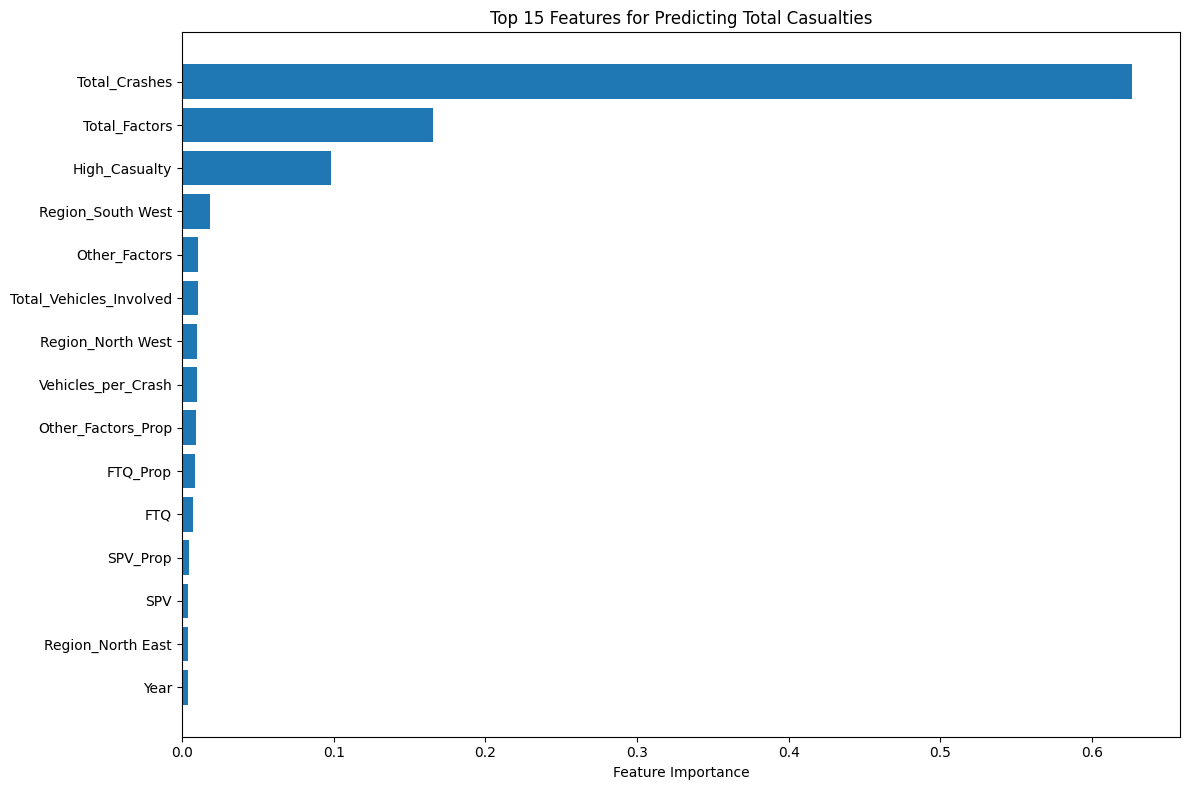

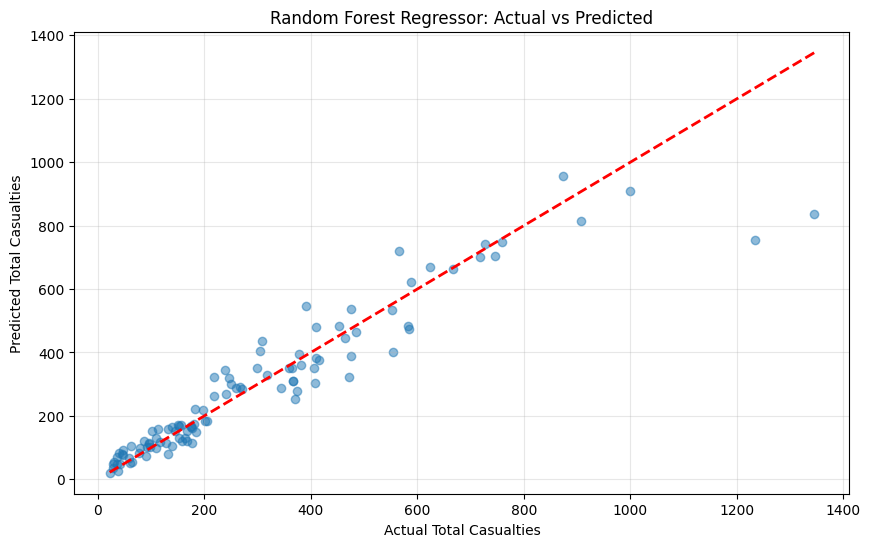

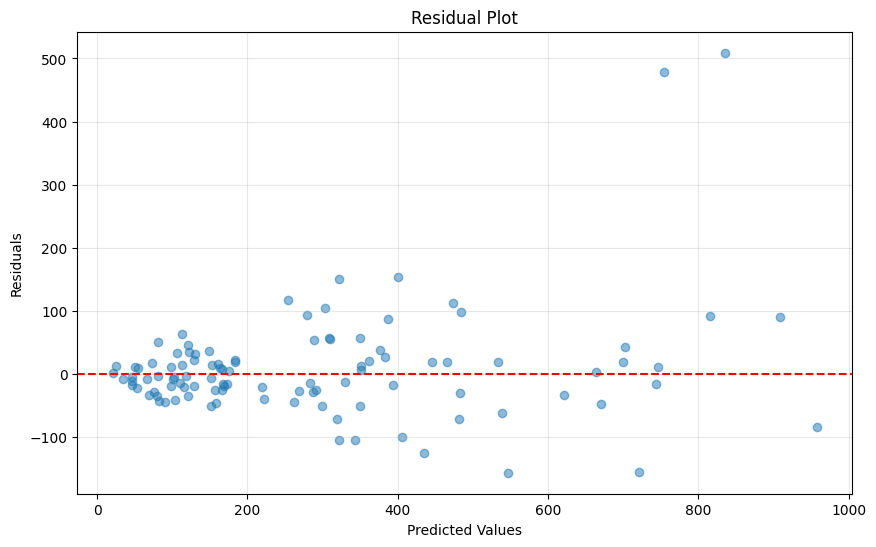

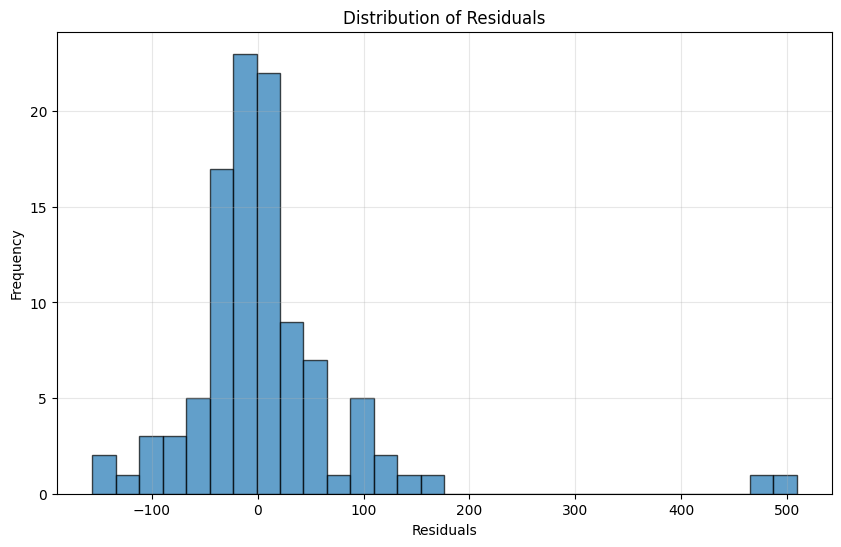


=== Alternative Prediction Targets ===

Predicting Total_Crashes:
R² Score: 0.9990
MAE: 0.9177

Predicting Num_Injured:
R² Score: 0.8986
MAE: 41.4895

Predicting Num_Killed:
R² Score: 0.7833
MAE: 12.7593

=== Model Comparison ===
                     R²        MAE
Total_Crashes  0.999034   0.917692
Num_Injured    0.898578  41.489519
Num_Killed     0.783332  12.759327

=== Simplified Hyperparameter Tuning ===
n_estimators=50, max_depth=5: R² = 0.8868
n_estimators=50, max_depth=10: R² = 0.8812
n_estimators=50, max_depth=20: R² = 0.8844
n_estimators=100, max_depth=5: R² = 0.8878
n_estimators=100, max_depth=10: R² = 0.8877
n_estimators=100, max_depth=20: R² = 0.8873
n_estimators=200, max_depth=5: R² = 0.8876
n_estimators=200, max_depth=10: R² = 0.8874
n_estimators=200, max_depth=20: R² = 0.8877

Best parameters: {'n_estimators': 100, 'max_depth': 5}
Best R² score: 0.8878

=== Example Prediction ===
Predicted Total Casualties: 178.78
Actual median Total Casualties in dataset: 217.00

=== M

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('Nigeria Crash Data P.csv')

# Display basic info
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

# Let's explore what we might want to predict
print("\nColumns with numerical values suitable for regression:")
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(numerical_cols.tolist())

# Let's identify potential target variables
# Based on the data, good candidates for prediction might be:
# 1. Total_Crashes
# 2. Num_Injured
# 3. Num_Killed
# 4. Total_Casualties
# 5. Casualty_Rate
# 6. Fatality_Rate

# For this example, let's predict Total_Casualties (Num_Injured + Num_Killed)
print("\nLet's build a model to predict Total_Casualties")

# Step 1: Prepare features and target
# Drop columns that are identifiers, dates, or derived from target
drop_cols = [
    'Quarter', 'State', 'Quarter_Date', 'State_Encoded',
    'Region', 'Region_Encoded', 'Total_Casualties', 'Casualty_Rate',
    'Num_Injured', 'Num_Killed', 'Fatality_Rate'
]

# Also drop the one-hot encoded state columns if we're keeping the region features
state_cols = [col for col in df.columns if col.startswith('State_')]
drop_cols.extend(state_cols)

# Create feature set X and target y
X = df.drop(columns=[col for col in drop_cols if col in df.columns])
y = df['Total_Casualties']

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Step 2: Check for missing values
print("\nMissing values in features:")
print(X.isnull().sum().sum())

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"\nTraining set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Step 4: Scale the features (optional for tree-based models but can help)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Build and train Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=100,  # Number of trees
    max_depth=10,      # Maximum depth of trees
    min_samples_split=5,  # Minimum samples to split a node
    min_samples_leaf=2,   # Minimum samples at a leaf node
    random_state=42,
    n_jobs=-1           # Use all available cores
)

print("\nTraining Random Forest Regressor...")
rf_model.fit(X_train_scaled, y_train)

# Step 6: Make predictions
y_pred_train = rf_model.predict(X_train_scaled)
y_pred_test = rf_model.predict(X_test_scaled)

# Step 7: Evaluate the model
print("\n=== Model Evaluation ===")
print("Training Set Performance:")
print(f"R² Score: {r2_score(y_train, y_pred_train):.4f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.4f}")

print("\nTest Set Performance:")
print(f"R² Score: {r2_score(y_test, y_pred_test):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.4f}")

# Step 8: Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n=== Top 20 Most Important Features ===")
print(feature_importance.head(20).to_string(index=False))

# Step 9: Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Features for Predicting Total Casualties')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Step 10: Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Total Casualties')
plt.ylabel('Predicted Total Casualties')
plt.title('Random Forest Regressor: Actual vs Predicted')
plt.grid(True, alpha=0.3)
plt.show()

# Step 11: Residual analysis
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)
plt.show()

# Step 12: Distribution of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True, alpha=0.3)
plt.show()

# Step 13: Let's also try predicting different targets
print("\n=== Alternative Prediction Targets ===")
alternative_targets = ['Total_Crashes', 'Num_Injured', 'Num_Killed']
results = {}

for target in alternative_targets:
    if target in df.columns:
        print(f"\nPredicting {target}:")
        X_alt = df.drop(columns=[col for col in drop_cols if col in df.columns])
        y_alt = df[target]

        # Split
        X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(
            X_alt, y_alt, test_size=0.2, random_state=42
        )

        # Scale
        X_train_alt_scaled = scaler.fit_transform(X_train_alt)
        X_test_alt_scaled = scaler.transform(X_test_alt)

        # Train model
        rf_alt = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
        rf_alt.fit(X_train_alt_scaled, y_train_alt)

        # Predict and evaluate
        y_pred_alt = rf_alt.predict(X_test_alt_scaled)
        r2 = r2_score(y_test_alt, y_pred_alt)
        mae = mean_absolute_error(y_test_alt, y_pred_alt)

        results[target] = {'R²': r2, 'MAE': mae}
        print(f"R² Score: {r2:.4f}")
        print(f"MAE: {mae:.4f}")

# Step 14: Compare model performance
print("\n=== Model Comparison ===")
comparison_df = pd.DataFrame(results).T
print(comparison_df)

# Step 15: Hyperparameter tuning (simplified version)
print("\n=== Simplified Hyperparameter Tuning ===")
n_estimators_options = [50, 100, 200]
max_depth_options = [5, 10, 20]

best_score = -np.inf
best_params = {}

for n_est in n_estimators_options:
    for depth in max_depth_options:
        # Create model with current parameters
        rf_tuned = RandomForestRegressor(
            n_estimators=n_est,
            max_depth=depth,
            random_state=42,
            n_jobs=-1
        )

        # Train and evaluate
        rf_tuned.fit(X_train_scaled, y_train)
        score = rf_tuned.score(X_test_scaled, y_test)

        if score > best_score:
            best_score = score
            best_params = {'n_estimators': n_est, 'max_depth': depth}

        print(f"n_estimators={n_est}, max_depth={depth}: R² = {score:.4f}")

print(f"\nBest parameters: {best_params}")
print(f"Best R² score: {best_score:.4f}")

# Step 16: Create a function for making predictions
def predict_casualties(features_dict, model=rf_model, scaler=scaler, feature_columns=X.columns):
    """
    Predict total casualties given feature values

    Parameters:
    features_dict: Dictionary with feature names as keys and values
    model: Trained Random Forest model
    scaler: Fitted StandardScaler
    feature_columns: List of feature column names

    Returns:
    prediction: Predicted total casualties
    """
    # Create a DataFrame with the input features
    input_df = pd.DataFrame([features_dict])

    # Ensure all columns are present
    for col in feature_columns:
        if col not in input_df.columns:
            input_df[col] = 0

    # Reorder columns to match training data
    input_df = input_df[feature_columns]

    # Scale the features
    input_scaled = scaler.transform(input_df)

    # Make prediction
    prediction = model.predict(input_scaled)[0]

    return prediction

# Example usage:
print("\n=== Example Prediction ===")
# Let's create an example with median values from the dataset
example_features = {
    'Total_Crashes': df['Total_Crashes'].median(),
    'Total_Vehicles_Involved': df['Total_Vehicles_Involved'].median(),
    'SPV': df['SPV'].median(),
    'DAD': df['DAD'].median(),
    'PWR': df['PWR'].median(),
    'FTQ': df['FTQ'].median(),
    'Other_Factors': df['Other_Factors'].median(),
    'Quarter_Num': 2,
    'Year': 2021,
    'Quarter_Sin': 0,
    'Quarter_Cos': -1,
    'Severe_Crash': 1,
    'High_Casualty': 0,
    'Total_Factors': df['Total_Factors'].median(),
    'SPV_Prop': df['SPV_Prop'].median(),
    'DAD_Prop': df['DAD_Prop'].median(),
    'PWR_Prop': df['PWR_Prop'].median(),
    'FTQ_Prop': df['FTQ_Prop'].median(),
    'Other_Factors_Prop': df['Other_Factors_Prop'].median(),
    'Vehicles_per_Crash': df['Vehicles_per_Crash'].median(),
    'Region_North East': 0,
    'Region_North West': 0,
    'Region_South East': 1,
    'Region_South South': 0,
    'Region_South West': 0
}

predicted_casualties = predict_casualties(example_features)
print(f"Predicted Total Casualties: {predicted_casualties:.2f}")
print(f"Actual median Total Casualties in dataset: {df['Total_Casualties'].median():.2f}")

print("\n=== Model Summary ===")
print("The Random Forest Regressor has been successfully trained and evaluated.")
print(f"Final model R² on test set: {r2_score(y_test, y_pred_test):.4f}")
print(f"Model can explain approximately {r2_score(y_test, y_pred_test)*100:.1f}% of variance in Total Casualties")
print("\nKey insights from feature importance:")
print("1. The most important features for predicting casualties are:")
for i, (feature, importance) in enumerate(feature_importance.head(5).values, 1):
    print(f"   {i}. {feature}: {importance:.4f}")